In [2]:
# import dependencies
# import sys
# !{sys.executable} -m pip install --user install tensorflow==2.8.0. 
import numpy as np
import pandas as pd
import glacierml as gl
RGI = gl.load_RGI()
data = gl.load_notebook_data(parameterization = '3')

In [6]:
data['VE / VF'] = data['Edasi Volume (km3)'] / data['Farinotti Volume (km3)']

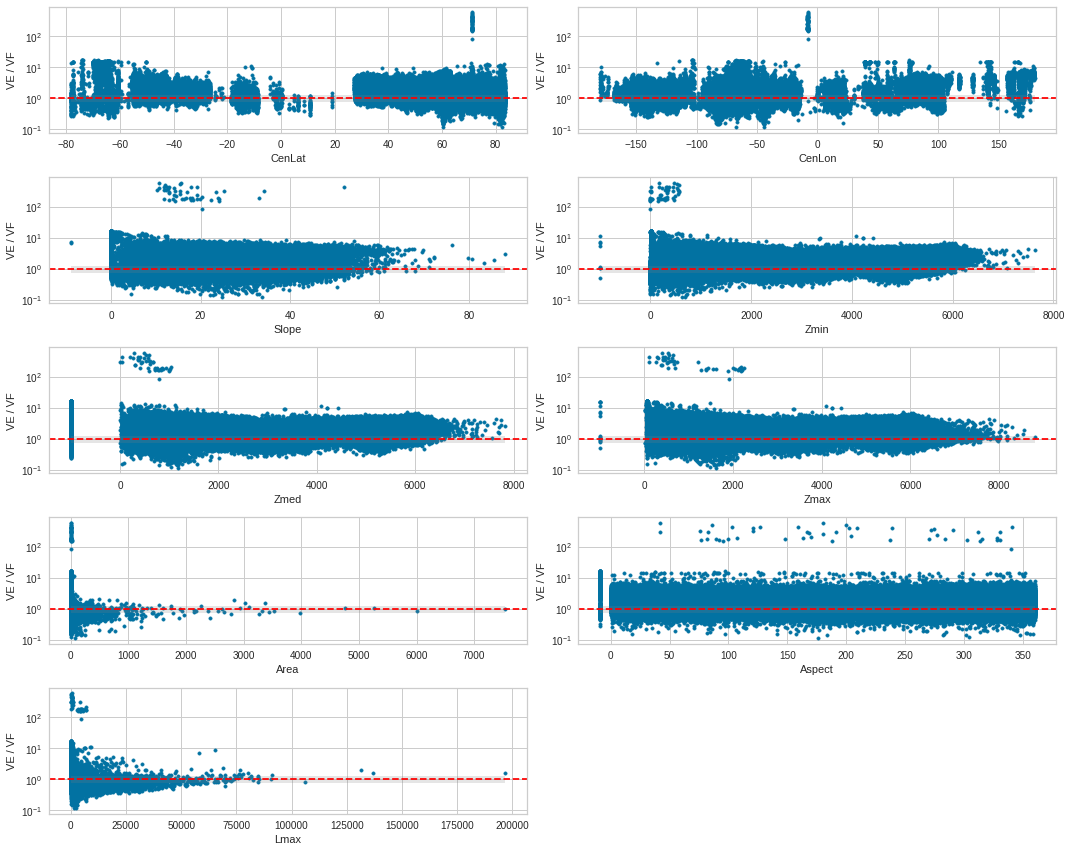

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
# plt.suptitle('Residuals by RGI feature' + 
#     ',\nLayer Architecture: ' + predictions['architecture'].loc[idx] +
#     ', Learning Rate: ' + predictions['learning rate'].loc[idx], fontsize=18, y=0.99)
fig.patch.set_facecolor('w')
dft = data[[
    'CenLat',
    'CenLon',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Area',
    'Aspect',
    'Lmax',

]]
for n, variable in enumerate(dft):
    ax = plt.subplot(5, 2, n + 1)
    plt.subplots_adjust(hspace=0.5)
    ax.set_ylabel('VE / VF')
    ax.set_xlabel(variable)
    ax.set_yscale('log')
    plt.scatter(
        dft[variable],
        data['VE / VF'],
        marker = '.'
    )
    ax.fill_between(
        x = (
            dft[variable].min(), dft[variable].max()
        ),
        y1 = 1.25,
        y2 = 0.75,
        facecolor = 'gray',
        alpha = 0.2
    )
    plt.axhline(y = 1.00, color = 'red', linestyle = '--')

plt.tight_layout()

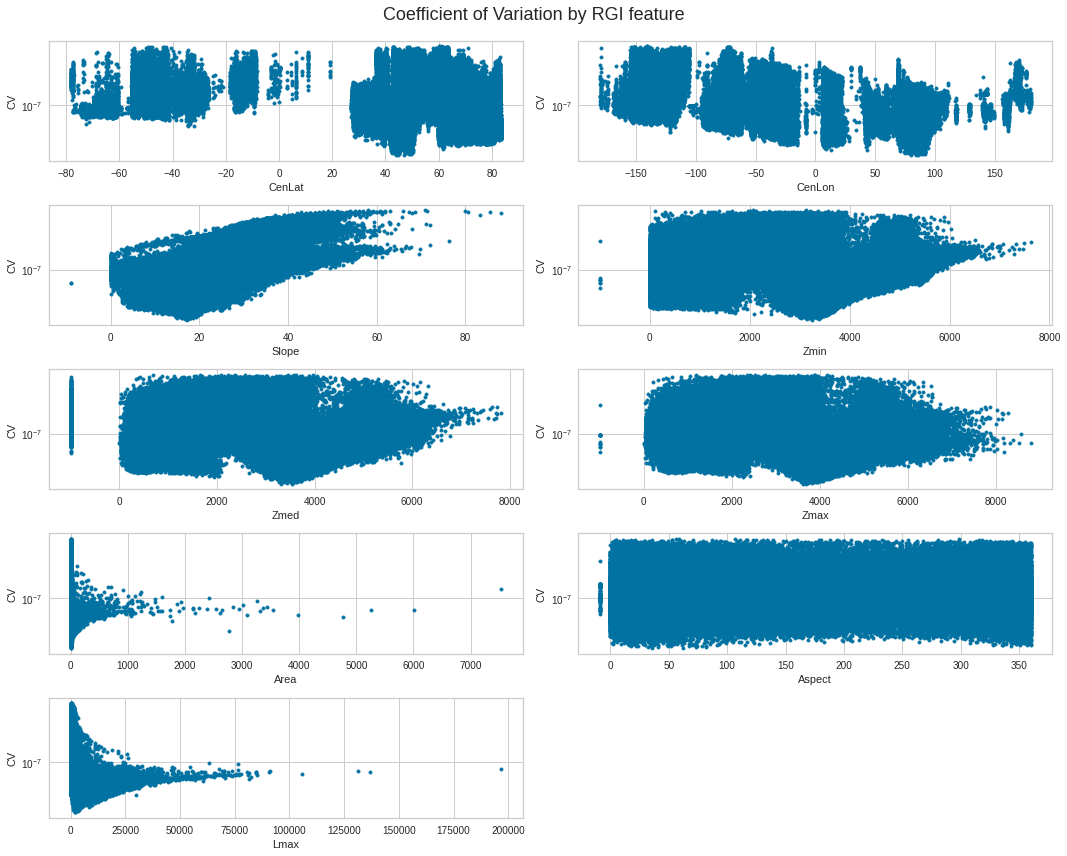

In [14]:
fig = plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Coefficient of Variation by RGI feature' ,
#     ',\nLayer Architecture: ' + predictions['architecture'].loc[idx] +
#     ', Learning Rate: ' + predictions['learning rate'].loc[idx]
              fontsize=18, y=0.99)
fig.patch.set_facecolor('w')
dft = data[[
    'CenLat',
    'CenLon',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Area',
    'Aspect',
    'Lmax',

]]
# ref['CoV'] = ref
for n, (variable) in (enumerate(dft)):

    ax = plt.subplot(5, 2, n + 1)
    plt.subplots_adjust(hspace=0.5)
    ax.set_ylabel('CV')
    ax.set_xlabel(variable)
    ax.set_yscale('log')
    plt.scatter(
        dft[variable],
        (((data['Edasi Volume Std Dev (km3)'] / data['Area']) / 1e3) / data['Edasi Mean Thickness']),
        marker = '.'
    )
#     ax.fill_between(
#         x = (
#             dft[variable].min(), dft[variable].max()
#         ),
#         y1 = 1.25,
#         y2 = 0.75,
#         facecolor = 'gray',
#         alpha = 0.2
#     )
#     plt.axhline(y = 1.00, color = 'red', linestyle = '--')

plt.tight_layout()